In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file = '/Users/forheart/Downloads/yelp_dataset/yelp_academic_dataset_review.json'

In [3]:
max_records = 1e5
df = pd.read_json(file, lines=True, chunksize=max_records)
data = pd.DataFrame()
try:
   for df_chunk in df:
       data = pd.concat([data, df_chunk])
except ValueError:
       print ('\nSome messages in the file cannot be parsed')

In [4]:
data.shape

(5996996, 9)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
data.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [8]:
# Create a pandas series containing the number of reviews for all businesses.
bybusiness = data['business_id'].value_counts()

In [9]:
df_business = pd.DataFrame({'business_id':bybusiness.index, 'review_counts':bybusiness.values})

In [10]:
df_business.shape

(188593, 2)

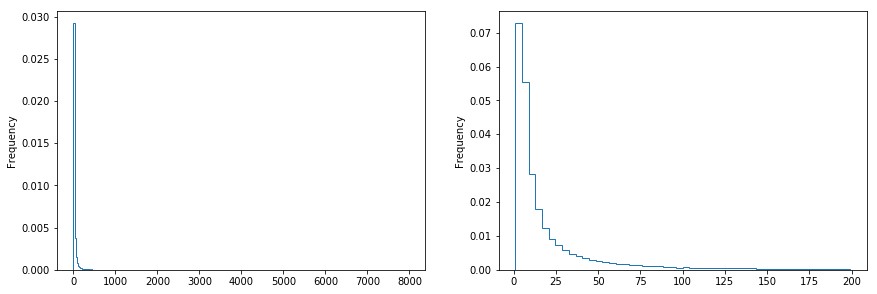

In [13]:
plt.subplot(1, 2, 1)
df_business['review_counts'].plot(kind='hist', bins=300, histtype='step', density=True)
plt.subplot(1, 2, 2)
df_business['review_counts'][df_business['review_counts'] < 200].plot(kind='hist', bins=50, histtype='step', density=True)
plt.subplots_adjust(left=0.125, bottom=0.1, right=2, top=1, wspace=None)

The above two graphs show that the distribution of the review counts of businesses is skewed to the right side, meaning most businesses have small review counts, only a small portion of the businesses have a lot of reviews.

In [18]:
print(np.percentile(df_business['review_counts'], [0, 95]))
print(np.percentile(df_business['review_counts'], [0, 75]))

[  1. 123.]
[ 1. 24.]


### The histograms of the review counts and percentile analysis show that 95% of business have less than 123 reviews, and 75% of the businesses have less than 24 reviews. In order to avoid those businesses that have very little reviews, I will randomly sample 1000 busineses from the top 5% businesses with most reviews. 

In [24]:
# the 5% businesses (9430 businesses) with most reviews. These busineses have more than 123 reviews.
business_sample = df_business.iloc[:9430]

# Ramdomly sample 1000 businesses.
business_sub = business_sample.sample(1000, random_state=1)

In [25]:
business_sub['review_counts'].sum()

308429

In [27]:
business_sub.head()

,business_id,review_counts
7555,fpADWrjAQwJJrBMBdBCvJg,146
3005,eOl6WS3oAjtGZpcXfv8tlA,282
5636,mnU3iGsL55MCWXiWV3AcAQ,183
8800,2gI7dlktBQXPZiuOW-HWvw,129
3832,JogUSDKa1xyG3lLEmD4Xjg,242


In [28]:
review = pd.merge(business_sub, data, on='business_id', how='left')

In [29]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308429 entries, 0 to 308428
Data columns (total 10 columns):
business_id      308429 non-null object
review_counts    308429 non-null int64
cool             308429 non-null int64
date             308429 non-null datetime64[ns]
funny            308429 non-null int64
review_id        308429 non-null object
stars            308429 non-null int64
text             308429 non-null object
useful           308429 non-null int64
user_id          308429 non-null object
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 25.9+ MB


In [39]:
# The predcition of the ratings will only use the text column, so some other columns will not be used.
review = review.drop(columns=['review_counts', 'cool', 'funny', 'useful'])

In [40]:
review.head()

,business_id,date,review_id,stars,text,user_id
0,fpADWrjAQwJJrBMBdBCvJg,2016-12-19,OEmutkjxr6ievjXvrgFGMA,1,"WOWOWOowow, jeeeeeeeeeeeeze. There is so much ...",0WcHiM_jT1jN-wxk790qBg
1,fpADWrjAQwJJrBMBdBCvJg,2017-05-23,qOqpwCwGtZH9RJc2gs4Dew,1,This location has the worst drive through I've...,Vo_68hV91XR04bZ993MKCg
2,fpADWrjAQwJJrBMBdBCvJg,2015-04-26,FWUnbMw4TvgdrBZD8G0JNw,1,"First time I tried Tropical smoothie, not impr...",0rHzL5Qy-IFrwSmRKehx2Q
3,fpADWrjAQwJJrBMBdBCvJg,2017-08-30,miJm99wYp5Z0SOzCwXtzVw,1,If you enjoy spending 10 mins in drive thru be...,SwzCXae8zEi77FA3hjYd1w
4,fpADWrjAQwJJrBMBdBCvJg,2014-06-14,nHTCFqKMq85UQKqGFMVA2Q,5,I gave it 5 stars just because I didn't have a...,hktqVwzT-qIordt-MAfa-Q


In [316]:
# Save the subset dataframe to a csv file due to the long time needed to load the full dataframe.
review.to_csv('review_sample')

In [419]:
# This will be the first line of code to restart the kernel
# 'res_review is a csv file of only restaurant reviews. 
review = pd.read_csv('res_review')

In [3]:
# Previous analysis indicated that even the sample size of 308429 is too slow to run the machine 
# learning algorithms, here an even smaller sample size was taken to make it faster.

In [342]:
review.head()

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0,xSs1Z1OrWC_KmhY0SPKJ1Q,0,2016-06-01,0,DsPX83pa6vVSASrHF0U1aQ,2,My server was polite but not very prompt. The ...,0,ubgsST240v6cc5C7Kt4zKQ
1,1,xSs1Z1OrWC_KmhY0SPKJ1Q,0,2015-05-06,0,HGw5_lZQ3lpnRHFmbK0-Ww,4,The food was good and the service was great! W...,1,xdcMl8ghySzhDgKzc7OPtQ
2,2,xSs1Z1OrWC_KmhY0SPKJ1Q,0,2016-10-30,0,VsH5hnYRbksrYnH4Vi-ZSg,3,I like to get the habachi vegetables or chicke...,0,rzY8uwz-JtfLowr2EcHo1A
3,3,xSs1Z1OrWC_KmhY0SPKJ1Q,0,2010-06-17,0,xSRTe2zjKjzYqyC-0EThSQ,2,My daughter and I decided to try Shiki one nig...,1,A2l6pDAwA5SkfuOd7E_npw
4,4,xSs1Z1OrWC_KmhY0SPKJ1Q,0,2015-10-22,0,3gctU9pG-ikd8XVW58p_wg,5,My husband and I don't eat out frequently beca...,0,GljH-HX4zGc-c87NGBDhSQ


## Exploratory Data Analysis

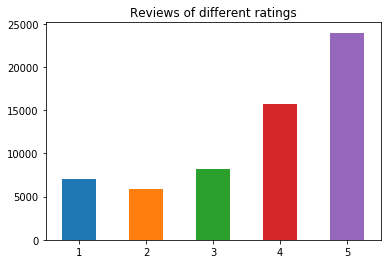

In [343]:
rating = review['stars'].value_counts(sort=False)
rating.plot(kind='bar', title = 'Reviews of different ratings', rot=0)

The 5 star reviews have the most counts, followed by 4, 3, 1 and 2.

In [344]:
print('There are {} unique users that wrote {} reviews.'.format(review.user_id.nunique(), review.shape[0]))

There are 51239 unique users that wrote 60788 reviews.


In [345]:
import seaborn as sns

In [346]:
# Create another column called text_length to count the word counts of each review.
review['text_length'] = review['text'].apply(lambda x:len(x.split()))

stars
1    124.191306
2    136.608718
3    130.909870
4    113.345003
5     86.381461
Name: text_length, dtype: float64

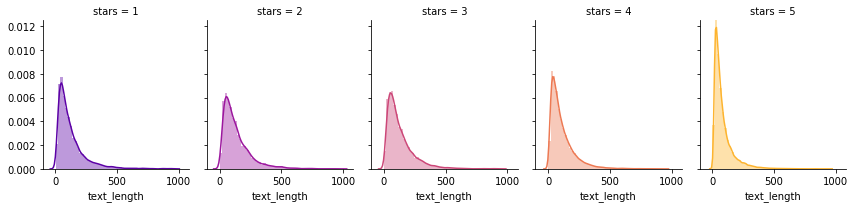

In [347]:
a = sns.FacetGrid(data = review, col = 'stars', hue = 'stars', palette='plasma', aspect=0.8)
a.map(sns.distplot, "text_length")
review.groupby('stars').mean()['text_length']

### The above analysis shows that people who tend to review a business as good (4 or 5 stars) have shorter reviews (86 or 113 words), and the reviews that have poorer ratings tend to be longer words.

In [348]:
# The one-way ANOVA tests the null hypothesis that the distribution of the text lengths of 
# all stars have the same mean length.

from scipy import stats

In [434]:
stats.f_oneway(review.stars[review['stars']==1], review.stars[review['stars']==2], 
               review.stars[review['stars']==3], review.stars[review['stars']==4],
              review.stars[review['stars']==5])

F_onewayResult(statistic=2.905944868262712e+19, pvalue=0.0)

The null hypothesis should be rejected because the pvalue is 0, meaning the mean text lengths for different stars are significantly different.

In [353]:
# Remove the punctuations and stopwords from the text
import nltk
from nltk.corpus import stopwords
import string
from wordcloud.wordcloud import WordCloud, STOPWORDS

In [354]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/forheart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [355]:
def cleaning(text):
    nopunc = [i for i in text if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split()
    nostopwords = [words for words in nn if words not in stopwords.words('english')]
    return(nostopwords)

In [356]:
# Test the function cleaning that was just created
text='i want to have noodles! ha~'
cleaning(text)

['want', 'noodles', 'ha']

In [357]:
star_5 = cleaning(review['text'][review.stars==5].values)

In [358]:
from PIL import Image

In [359]:
star_5_bow = ' '.join(star_5)

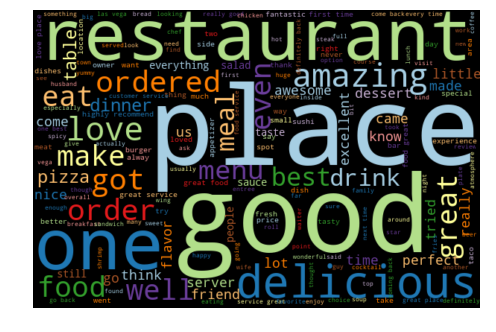

In [360]:
# Create a word cloud for the 5 starred reviews
stopwords = set(STOPWORDS)
wordcloud_5 = WordCloud(colormap = "Paired", width = 300, height = 200, scale=2, max_words=1000, 
                           stopwords=stopwords).generate(star_5_bow)
plt.figure(figsize = (8,12))
plt.imshow(wordcloud_5, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_5.to_file("star_5.png")

The most frequent words are place, good, retaurants, great, one, amazing, delicious.

In [361]:
from nltk.corpus import stopwords
star_4 = cleaning(review['text'][review.stars==4].values)
star_4_bow = ' '.join(star_4)

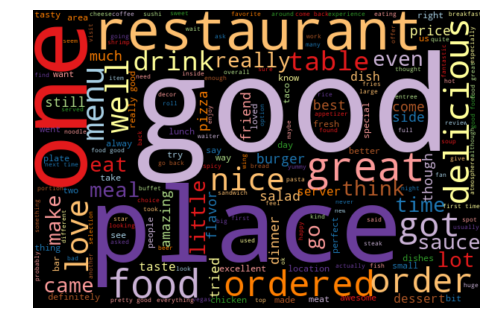

In [362]:
# # Create a word cloud for the 4 starred reviews
stopwords = set(STOPWORDS)
wordcloud_4 = WordCloud(colormap = "Paired", width = 300, height = 200, scale=2, max_words=1000, 
                           stopwords=stopwords).generate(star_4_bow)
plt.figure(figsize = (8,12))
plt.imshow(wordcloud_4, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_4.to_file("star_4.png")

In [ ]:
The top words are good, place, one, restaurant...

In [363]:
from nltk.corpus import stopwords
star_1 = cleaning(review['text'][review.stars==1].values)

In [364]:
star_1_bow = ' '.join(star_1)

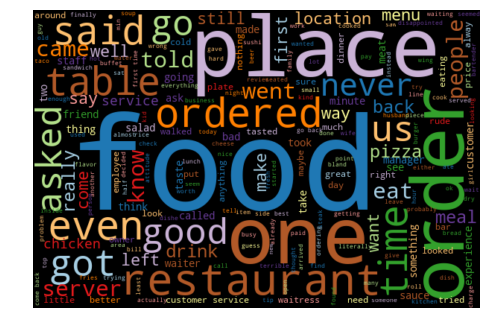

In [365]:
# # Create a word cloud for the 1 starred reviews
stopwords = set(STOPWORDS)
wordcloud_1 = WordCloud(colormap = "Paired", width = 300, height = 200, scale=2, max_words=1000, 
                        stopwords=stopwords).generate(star_1_bow)
plt.figure(figsize = (8,12))
plt.imshow(wordcloud_1, interpolation="bilinear", cmap = plt.cm.autumn)
plt.axis('off')
plt.show()
wordcloud_1.to_file("star_1.png")

#### The 5 star reviews use positive words like good, great, love, delicous, amazing. The 4 star reviews have similar words as 5 stars, but not as many "love", "amazing", "best" as in 5 star reviews. The most frequent word for all reviews would be a neutral word "place". The most request words in 1 star reviews are neutral words such as place, food, time, said, total, table, order, service, never.

## Prediction of the ratings

### Multinomial Naive Bayes Classifier

In [366]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [367]:
def cleaning_text(text):
    nopunc = [i for i in text if i not in string.punctuation]
    nn = "".join(nopunc)
    nn = nn.lower().split()
    nostopwords = [words for words in nn if words not in stopwords.words('english')]
    cleantext = ' '.join(nostopwords)
    return(cleantext)

In [436]:
review = review.sample(30000, random_state=2)

In [437]:
review.stars.value_counts()

5    11933
4     7694
3     4021
1     3460
2     2892
Name: stars, dtype: int64

In [421]:
# Use the cleaned text as the feature variables
from nltk.corpus import stopwords
review['clean_text'] = review['text'].apply(cleaning_text)

In [422]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values

In [423]:
# Multinomial Naive Bayes without cross validation
nb = MultinomialNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [424]:
y_pred = nb.predict(X_test)

In [425]:
y_pred[:10]

array([3, 1, 4, 4, 5, 4, 5, 5, 5, 5])

In [426]:
print('The accuracy score for the train set is', nb.score(X_train, y_train))
print('The accuracy score for the test set is', nb.score(X_test, y_test))

The accuracy score for the train set is 0.7601666666666667
The accuracy score for the test set is 0.581


#### In multi-label classification, classifier.score is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted. So an accuracy score of 0.58 is not too bad.

In [427]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 476,   93,   54,   31,   38],
       [ 184,   91,  161,   99,   43],
       [  63,   40,  240,  369,   92],
       [  20,    9,   76,  705,  729],
       [  21,   10,   22,  360, 1974]])

In [428]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.62      0.69      0.65       692
           2       0.37      0.16      0.22       578
           3       0.43      0.30      0.35       804
           4       0.45      0.46      0.45      1539
           5       0.69      0.83      0.75      2387

   micro avg       0.58      0.58      0.58      6000
   macro avg       0.51      0.49      0.49      6000
weighted avg       0.55      0.58      0.56      6000



#### All metrics, precision, recall and f1-score are highest for 5 star reviews, followed by 1 star reviews. It shows that the naive bayes model works better for the extremely good or bad ratings. The recalls for class 2 and 3 are very low, because neutral customer experiences might not have distinct features to be labeled as neutral.

#### Picking Hyperparameters for Naive Bayes

In [429]:
# Use an elbow approach to decide the min_df
X1 = X >= 1
# Take the sum of each document count along the columns of X to get the total document count that word
# appears in all reviews.
xi = np.sum(X1, axis = 0)

In [430]:
print('The maximum number of a word in all documents is ', np.amax(xi))
print('The minimum number of a word in all documents is ', np.amin(xi))

The maximum number of a word in all documents is  15654
The minimum number of a word in all documents is  1


In [438]:
xx = np.linspace(1,15654, num=15654)
n = xi.shape[1]
yy = np.empty(15654)
for i in range(15654):
    yy[i] = (np.sum(xi < xx[i]))/n*100

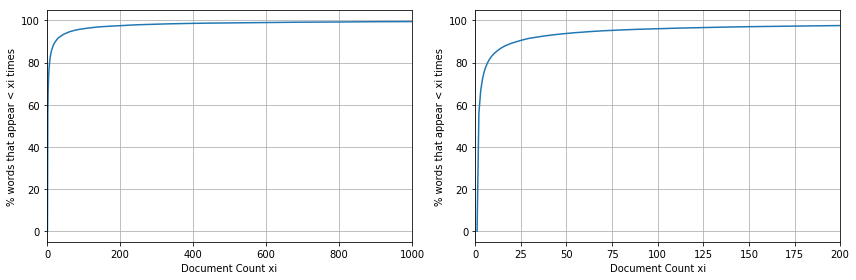

In [439]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.plot(xx, yy)
ax1.set_xlim([0, 1000])
ax1.set_xlabel('Document Count xi')
ax1.set_ylabel('% words that appear < xi times')
ax1.grid(True)

ax2.plot(xx, yy)
ax2.set_xlim([0, 200])
ax2.set_xlabel('Document Count xi')
ax2.set_ylabel('% words that appear < xi times')
ax2.grid(True)

fig.tight_layout()
plt.show()

#### df_min = 20 was picked.

In [440]:
vectorizer.vocabulary_['place']

34053

In [441]:
vectorizer.get_feature_names()[34053]

'place'

In [442]:
name = vectorizer.get_feature_names()

In [443]:
len(name)

50680

In [444]:
X2 = X >= 1
xx = np.sum(X2, axis = 0)

In [445]:
xx[0, 34053]

11767

In [ ]:
# According to the wordcloud analysis, the most frequent nonstop word in reviews of all stars is "place". 
# Now get the count of the word "place“ appears in all reviews.


In [446]:
vectorizer = CountVectorizer(min_df=20, max_df=11000)
X = vectorizer.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [448]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [449]:
print('The accuracy score for the train set is', nb.score(X_train, y_train))
print('The accuracy score for the test set is', nb.score(X_test, y_test))

The accuracy score for the train set is 0.6772916666666666
The accuracy score for the test set is 0.596


#### The accuracy score for the test set after using min_df is slightly better than without min_df.

In [450]:
from sklearn import metrics

In [451]:
# Create the list of alphas: alphas
# After several trials, the range below was chosen to pick the best alpha
alphas = np.arange(1, 2, 0.2)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(X_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(X_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  1.0
Score:  0.596

Alpha:  1.2
Score:  0.597

Alpha:  1.4
Score:  0.5968333333333333

Alpha:  1.5999999999999999
Score:  0.5963333333333334

Alpha:  1.7999999999999998
Score:  0.5961666666666666



#### The best hyperparameter alpha for the Multinomial Naive Bayes is 1.2.

In [452]:
# Use the best alpha and min_df
nb = MultinomialNB(alpha=1.2)
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.2, class_prior=None, fit_prior=True)

In [453]:
print('The accuracy score for the train set is', nb.score(X_train, y_train))
print('The accuracy score for the test set is', nb.score(X_test, y_test))

The accuracy score for the train set is 0.6765
The accuracy score for the test set is 0.597


#### Use tfidfvectorizer instead of countvectorizer

In [454]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvectorizer = TfidfVectorizer(min_df=20, max_df=11000, stop_words='english')
X_tfidf = tfidfvectorizer.fit_transform(review.clean_text)
y_tfidf = review.stars.values

In [455]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=1, stratify=y)
clf_tfidf = MultinomialNB().fit(Xt_train, yt_train)

In [456]:
print('The accuracy score for the train set is', clf_tfidf.score(Xt_train, yt_train))
print('The accuracy score for the test set is', clf_tfidf.score(Xt_test, yt_test))

The accuracy score for the train set is 0.6110833333333333
The accuracy score for the test set is 0.5491666666666667


#### Try n-gram range in sklearn for CountVectorizer()

In [457]:
# Try 2-gram
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
vectorizer1 = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,2), min_df=20)

In [458]:
X = vectorizer1.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values

In [459]:
clf = MultinomialNB()

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [461]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [462]:
print('The accuracy score for the train set is', clf.score(X_train, y_train))
print('The accuracy score for the test set is', clf.score(X_test, y_test))

The accuracy score for the train set is 0.7226666666666667
The accuracy score for the test set is 0.6085


In [463]:
from sklearn.model_selection import GridSearchCV

In [464]:
alpha_space = np.linspace(0.1, 1, 10)
param_grid = {'alpha': alpha_space}
clf = GridSearchCV(MultinomialNB(), param_grid, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [465]:
y_pred = clf.predict(X_test)
print('The accuracy score for the train set is', clf.score(X_train, y_train))
print('The accuracy score for the test set is', clf.score(X_test, y_test))
print('The best hyperparameter is ', clf.best_params_)

The accuracy score for the train set is 0.7272916666666667
The accuracy score for the test set is 0.6093333333333333
The best hyperparameter is  {'alpha': 0.6}


In [466]:
# Try bigram and trigram
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
vectorizer = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,3), min_df=20, max_df=11000)

In [467]:
X = vectorizer.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values

In [468]:
clf = MultinomialNB()

In [469]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [470]:
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [471]:
print('The accuracy score for the train set is', clf.score(X_train, y_train))
print('The accuracy score for the test set is', clf.score(X_test, y_test))

The accuracy score for the train set is 0.72225
The accuracy score for the test set is 0.606


In [472]:
alpha_space = np.linspace(0.1, 1, 10)
param_grid = {'alpha': alpha_space}
clf = GridSearchCV(MultinomialNB(), param_grid, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [473]:
y_pred = clf.predict(X_test)
print('The accuracy score for the train set is', clf.score(X_train, y_train))
print('The accuracy score for the test set is', clf.score(X_test, y_test))
print('The best hyperparameter is ', clf.best_params_)

The accuracy score for the train set is 0.7271666666666666
The accuracy score for the test set is 0.6063333333333333
The best hyperparameter is  {'alpha': 0.6}


### Random Forest Classification

In [474]:
# Try to use a random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [475]:
%time rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

CPU times: user 1min 21s, sys: 903 ms, total: 1min 22s
Wall time: 1min 23s


In [476]:
print('The accuracy score for the train set is', rf.score(X_train, y_train))
print('The accuracy score for the test set is', rf.score(X_test, y_test))

The accuracy score for the train set is 0.9999166666666667
The accuracy score for the test set is 0.5598333333333333


The accuracy score for the test set apparently shows over-fitting.

### Fine tuning of hyperparameters of Random Forest Regression

In [477]:
from sklearn.model_selection import GridSearchCV

In [478]:
# Set threshold for early stopping in tree growth
rf = RandomForestClassifier(n_estimators=100)

param_grid={'max_depth': [None, 10, 20],
            'max_features':[0.1, 0.2]} 

estimator = GridSearchCV(rf, param_grid, cv=5)

In [479]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [None, 10, 20], 'max_features': [0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [480]:
y_pred = estimator.predict(X_test)

In [481]:
print('The accuracy score for the train set is', estimator.score(X_train, y_train))
print('The accuracy score for the test set is', estimator.score(X_test, y_test))
print('The best hyperparameters are ', estimator.best_params_)

The accuracy score for the train set is 0.9999583333333333
The accuracy score for the test set is 0.5528333333333333
The best hyperparameters are  {'max_depth': None, 'max_features': 0.1}


### Gradient Boosting Machine

In [482]:
from sklearn.ensemble import GradientBoostingClassifier

In [483]:
# Set the min_df and max_df parameters to make the column numbers close to 3000.
vectorizer = CountVectorizer(min_df=60, max_df=12000)
X = vectorizer.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values

In [484]:
X.shape

(30000, 2771)

In [485]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [486]:
gbc = GradientBoostingClassifier()
%time gbc.fit(X_train, y_train)

CPU times: user 60 s, sys: 1.36 s, total: 1min 1s
Wall time: 1min 2s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [487]:
print('The accuracy score for the train set is', gbc.score(X_train, y_train))
print('The accuracy score for the test set is', gbc.score(X_test, y_test))

The accuracy score for the train set is 0.6110833333333333
The accuracy score for the test set is 0.5581666666666667


In [488]:
# Fine tuning of hyperparameters of Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, validation_fraction=0.2, n_iter_no_change=5, tol=0.001 )

In [489]:
from sklearn.model_selection import RandomizedSearchCV

In [490]:
param_grid={'learning_rate': [0.02, 0.1, 0.2],
            'max_depth':[2, 3], 
            'max_features':[0.1, 0.2],
            'subsample':[0.2, 1]
           } 
estimator = RandomizedSearchCV(gbc, param_grid, cv=5)

In [491]:
estimator.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...       subsample=1.0, tol=0.001, validation_fraction=0.2, verbose=0,
              warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'learning_rate': [0.02, 0.1, 0.2], 'max_depth': [2, 3], 'max_features': [0.1, 0.2], 'subsample': [0.2, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [492]:
print('The accuracy score for the train set is', estimator.score(X_train, y_train))
print('The accuracy score for the test set is', estimator.score(X_test, y_test))

The accuracy score for the train set is 0.58725
The accuracy score for the test set is 0.5496666666666666


#### Among the algorithms that were tried, using the CountVectorizor of 2-gram and Multinomial Naive Bayes has got the best predictive power, the test accuracy score is 0.609. And the best alpha is 0.4.

### What are the strongly predictive features?

In [493]:
# Get the 10 most strongly predictive features when using bigram and trigram 
# countvectorizer and Multinomial Naive Bayes.
from sklearn.feature_selection import RFE

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
vectorizer = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,3), min_df=20, max_df=11000)

X = vectorizer.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# create a gradient boosting regressor
model = MultinomialNB()
# create the RFE model and select 10 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X_train, y_train)

In [494]:
words = np.array(vectorizer.get_feature_names())

In [495]:
# The ten most important features for the countvectorizer using bigram and trigram are

words[rfe.support_]

array(['give zero', 'give zero stars', 'great care us', 'instead 5',
       'notch service', 'reason didnt give', 'took great',
       'top notch service', 'worst customer service', 'worst place'],
      dtype='<U27')

In [496]:
# Get the 10 most strongly predictive features when using bigram
# X_train and y_train needs to be updated by using vectorizer1

TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
vectorizer1 = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1,2), min_df=20, max_df=11000)

In [502]:
X = vectorizer1.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [503]:

model = MultinomialNB()
rfe1 = RFE(model, 10)
rfe1 = rfe1.fit(X_train, y_train)

In [504]:
words1 = np.array(vectorizer1.get_feature_names())
# The ten most important features for the countvectorizer using bigram are
words1[rfe1.support_]

array(['best italian', 'give zero', 'instead 5', 'manager told',
       'notch service', 'place rocks', 'recommend everyone', 'took great',
       'worst customer', 'worst place'], dtype='<U24')

In [505]:
# Get the 10 most strongly predictive features when using unigram
# X_train and y_train needs to be updated by using the matching vectorizer
# Use the best alpha
vectorizer2 = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, min_df=20, max_df=11000)
X = vectorizer2.fit_transform(review.clean_text)
X = X.tocsc()
y = review.stars.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

model = MultinomialNB(alpha=1.2)
rfe2 = RFE(model, 10)
rfe2 = rfe2.fit(X_train, y_train)

In [507]:
words2 = np.array(vectorizer2.get_feature_names())
# The ten most important features for the countvectorizer using unigram are

words2[rfe2.support_]

array(['disrespectful', 'flawless', 'insulting', 'locked', 'magnificent',
       'manny', 'prakash', 'redeeming', 'remembers', 'sublime'],
      dtype='<U15')

In [514]:
model = MultinomialNB(alpha=1.2)
model.fit(X_train, y_train)

x = np.eye(X_test.shape[1]) #Return a 2-D array with ones on the diagonal and zeros elsewhere.

prob = model.predict_log_proba(x)

In [515]:
prob.shape

(5427, 5)

In [516]:
# Here we define the good_words to be the words that have the highest probability in reviews with 5 stars.
# and define the bad_words to be words that have the higheset probability in reviews with 1 stars.
prob_good = prob[:, 0]
prob_bad = prob[:, 4]

In [517]:
ind_good = np.argsort(prob_good)  #Returns the indices that would sort an array
ind_bad = np.argsort(prob_bad)

In [518]:
# Here we define the good_words to be the words used most in reviews with 5 stars.

good_words = words2[ind_good[:10]]
bad_words = words2[ind_bad[:10]]

In [519]:
good_words

array(['delish', 'gem', 'polenta', 'unique', 'beautifully', 'perfect',
       'perfection', 'delightful', 'hearty', 'pumpkin'], dtype='<U15')

In [520]:
bad_words

array(['flavorless', 'poisoning', 'unprofessional', 'worst', 'tasteless',
       'aok', 'terrible', 'unacceptable', 'luke', 'lacked'], dtype='<U15')

### Popular food recommendation

Get a list of common food items from nltk.corpus.wordnet

In [521]:
from nltk.corpus import wordnet as wn

import nltk
nltk.download('wordnet')

In [523]:
food = wn.synset('food.n.02')

In [524]:
food_list = list(set(w for s in food.closure(lambda s:s.hyponyms()) for w in s.lemma_names()))

In [525]:
len(food_list)

1621

In [528]:
print(food_list[:10])

['scrapple', 'mutton', 'liver pudding', 'porkchop', 'sour cherry', 'graham cracker', 'grey mullet', 'rack of lamb', 'apple', 'wafer']


In [527]:
# Change the underscore in the food_list to space
for i in range(len(food_list)):
    if '_' in food_list[i]:
        food_list[i] = food_list[i].replace('_', ' ')
print(food_list[:10])

['scrapple', 'mutton', 'liver pudding', 'porkchop', 'sour cherry', 'graham cracker', 'grey mullet', 'rack of lamb', 'apple', 'wafer']


In [562]:
def food_label(ID):
    '''Create a list of food items that appear in the reviews for a restaurant given the business ID'''
    text = ' '.join(review['clean_text'][review.business_id == ID]).split()
    food_items = []
    for word in text:
        if (word not in food_items) & (word in food_list):
            food_items.append(word)
    return food_items

In [563]:
# Take a sample from all the restaurants and test the function defined, food_label
id_test = review['business_id'].sample(n=1).values[0]
print(food_label(id_test))

['plate', 'bread', 'fries', 'sucker', 'chorizo', 'croissant', 'orange', 'pomegranate', 'date', 'salmon', 'chicken', 'pastry', 'cake', 'cherry', 'roll', 'shrimp', 'grits', 'cheese', 'quiche', 'side', 'truffle', 'pumpkin', 'roast', 'beef', 'pretzel', 'bun', 'potato', 'apricot', 'sole', 'strawberry', 'tart', 'rib', 'veg', 'avocado', 'toast', 'crab', 'lemon', 'cookie', 'banana', 'chocolate', 'blueberry', 'mascarpone', 'gem', 'tomatillo', 'tomato', 'baguette', 'granola', 'round', 'greens', 'chile', 'cut', 'turkey', 'patty', 'takeout', 'bacon', 'apple', 'cobbler', 'waffle', 'meat', 'pancake', 'citrus', 'fish', 'mozzarella', 'eater', 'joint', 'peach', 'pork', 'stick', 'chili', 'raisin', 'loaf', 'heart', 'ham', 'green', 'sausage', 'spinach', 'scallop', 'biscuit', 'butter', 'cheddar', 'chips', 'scone', 'muffin', 'asparagus', 'raspberry', 'bean', 'squash', 'game', 'chilly', 'onion', 'lobster', 'profiterole', 'lox', 'pie', 'mango', 'macaroon', 'eggplant', 'berry', 'ravioli', 'brownie', 'shortcake

A shrinkage estimator takes account of number of votes and the mean of the score. For example, Imdb is possibly the most famous example of this, how they calculate which movies will make it onto the top 250.
weighted rating WR = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C , where:

* R = average for the movie (mean) = (Rating)
* v = number of votes for the movie = (votes)
* m = minimum votes required to be listed in the Top 250 (currently 3000)
* C = the mean vote across the whole report (currently 6.9)

Here, we will create a similar shrinkage estimator to recommend the top 5 most popular food items for a restaurant.

WR = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C, where 

* R = average for the food item (mean)
* v = number of reviews that mention the food item
* m = minimum memtions required to be listed in the top 5 most popular dishes (food items)
* C = the mean star across the whole sample

In [629]:
# Here we define a function to calculate a score of rating taking accout of the number of reviews
# that a food item appears for that restaurant
# The minimum mentions is 3, so a food item needs to be appear at least in three reviews in order to be counted, so m = 3.

C = np.mean(review['stars'])
print('The mean ratings across the whole sample set is ', C)

The mean ratings across the whole sample set is  3.7249333333333334


In [630]:
def score_estimator(R, v):
    C = np.mean(review['stars'])
    return (v/(v+3))*R + (3/(v+3))*C

In [653]:
def popular_food(ID):
    '''Calculates the estimated score using shrinkage estimator of reviews in which the food item appears for a restaurant with
    known business_id'''
    
    # Use the food_label function to get a list of food items in all reviews of this restaurant
    food_items = food_label(ID)
    
    array = review['clean_text'][review.business_id == ID].values
    n = len(array)
    
    # Create an empty dictionary to store the food items mentioned in the reviews and its average score
    score_dict=dict()
    
    for food_item in food_items:
        score_list = []
        v = 0
        for i in range(n):
            if food_item in array[i].split():
                score_list.append(review['stars'].values[i])
                v += 1
        score_dict[food_item] = score_estimator(np.mean(score_list), v) # Use the score_estimator function
    
    # return the five food items with the highest score with shrinkage estimator    
    return sorted(score_dict, key=score_dict.__getitem__, reverse=True)[:5]

In [654]:
popular_food(id_test)

['cobbler', 'green', 'onion', 'produce', 'brownie']

In [659]:
# Take five restaurant samples using business_id, and list the most popular food items using the 
# popular_food function

id_test = review['business_id'].sample(n=5).values
list(map(popular_food, id_test))

[['lasagna', 'plate', 'butter', 'fish', 'potato'],
 ['rib', 'pork', 'eater', 'leftovers', 'round'],
 ['lime', 'heart', 'chilly', 'tomato', 'butter'],
 ['cauliflower', 'tamarind', 'prawn', 'game', 'chilli'],
 ['cut', 'rib', 'sirloin', 'chilly', 'pepper']]

### Limitations

The limitations of this function of the food recommendation are that,

1) I don't have the menu item names to begin with, so I used the a food list from nltk.corpus wordnet.

2) Sometimes, there are several food items in one review, for example, "the fish is good, but the beef is awful". This model treats them as the same rating using the star rating of that review. More work could be done to analyze the reviews by sentence, and by the predicted score of that sentence in which the food item appears. 

### Future work

Future analysis would be 

1) label the food items by phrases to create a list that is more similar to the real menu, for example, if "pork" and "rib" are together, the menu item might be "pork rib".

2) the sentiment analysis of reviews by sentence, so a more accurate food recommendation model can be built.